In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("./Pokemon.csv")

# What is this?
We have a Dataset of Pokemons. They have various values which indicate there strongness, total is simply the sum of these values.

Got this set from https://www.kaggle.com/abcsds/pokemon

Got the swarmplot idea from https://www.kaggle.com/ndrewgele/visualizing-pok-mon-stats-with-seaborn

Have a look:

In [4]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [140]:
os.listdir("figures/")

['distributions.svg', 'example_heatmap.svg', 'example_swarmplot.svg']

Okay, please try to create the following images:

<table>
<tr>
    <td rowspan=2><img src='figures/distributions.svg' /></td>
    <td><img src='figures/example_heatmap.svg' /></td>
</tr><tr>
    <td><img src='figures/example_swarmplot.svg' /></td>
</tr>
</table>

In [142]:
from IPython.display import display, HTML
display(HTML("<h1>Okay, you want not to do this on your own.. then now: How to do this (scroll down)</h1>"))
for i in range(20):
    display(HTML("<br />"))

Okay, let's go! 
<table>
<tr>
<td><img src='https://media4.giphy.com/media/vsyKKf1t22nmw/giphy.gif' /></td>
<td><img src='https://media.giphy.com/media/yhfTY8JL1wIAE/giphy.gif' /></td>
<td><img src='https://media.giphy.com/media/rAm0u2k17rM3e/giphy.gif' /></td>
</tr>
</table>
Now, let us inspect, which distributions these numerical columns have:

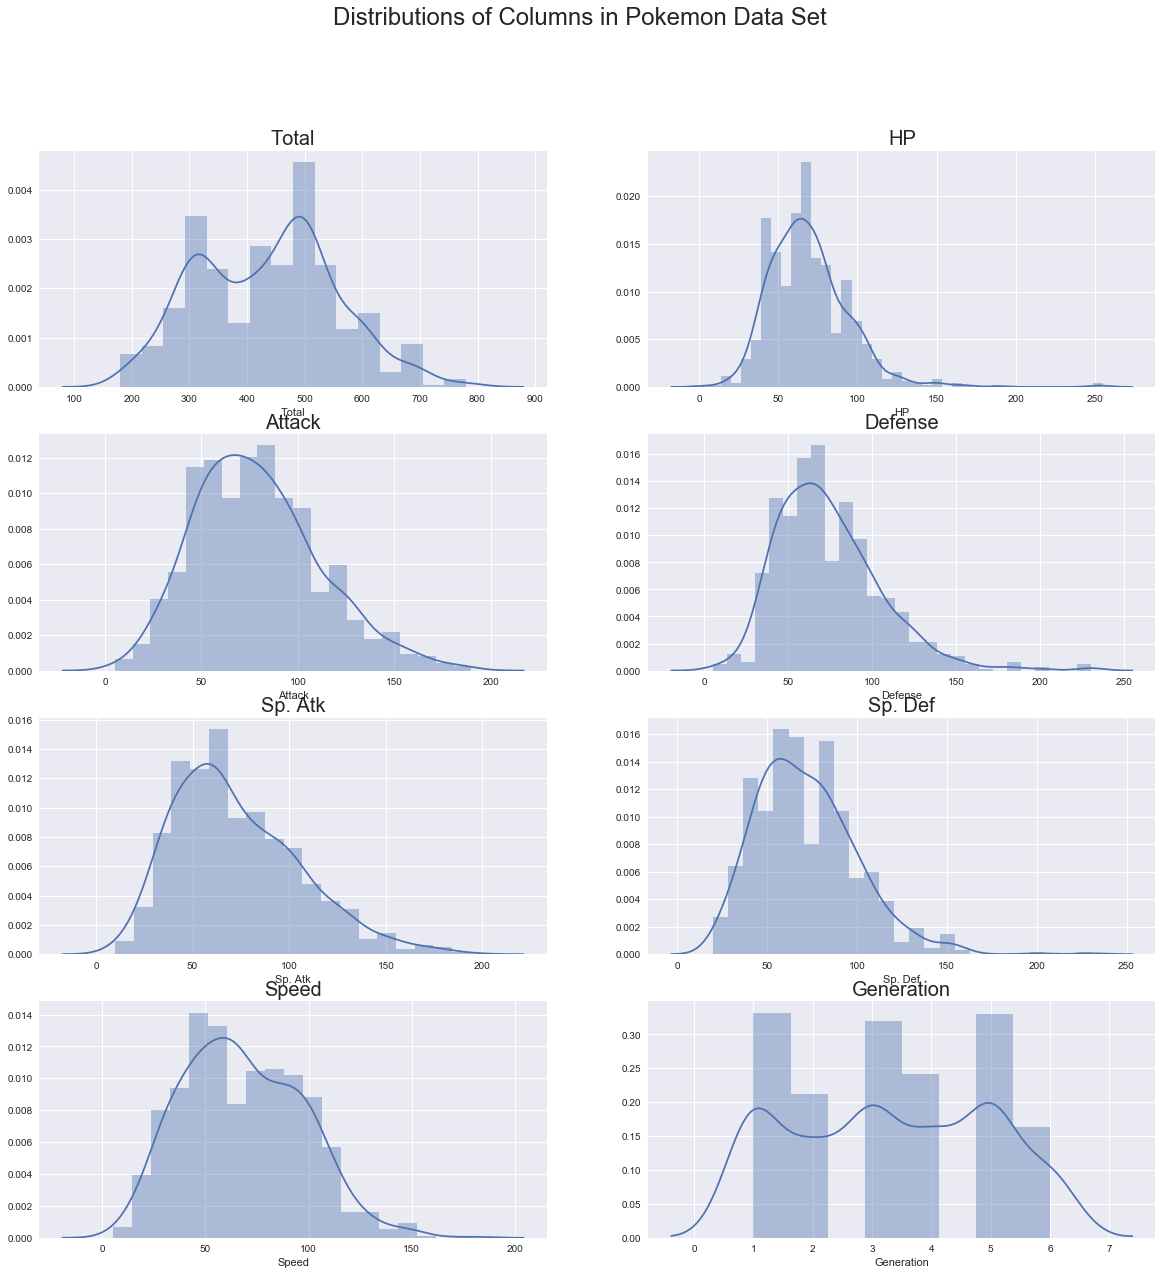

In [134]:
numerical_cols = [col for col in data.columns if data[col].dtype == 'int64']
numerical_cols.pop(0)
f, ax = plt.subplots(len(numerical_cols) / 2 + len(numerical_cols) % 2, 2, figsize=(20,20))
for i, col in enumerate(numerical_cols):
    axx = ax[i / 2, i % 2]
    sns.distplot(data[col], ax=axx)
    axx.set_title(col, fontsize=20)
f.suptitle("Distributions of Columns in Pokemon Data Set", fontsize=24)
f.savefig("figures/distributions.svg")

Okay, nice. 

Now, some Heatmap of the mean of the type1 to type 2 pokemons:

In [117]:
numerical_cols.remove("Generation")

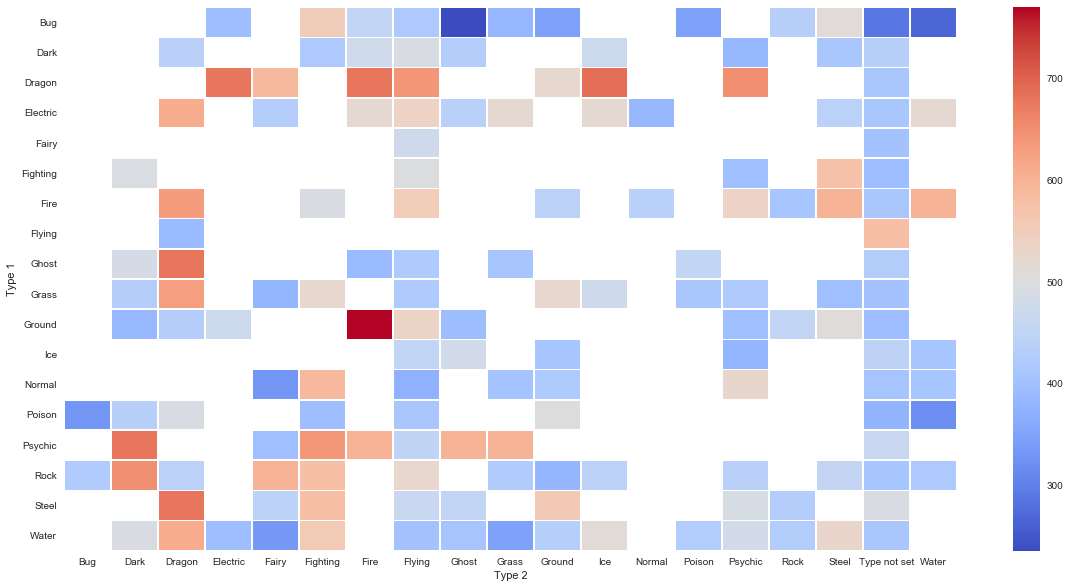

In [136]:
for col in ['Type 1', 'Type 2']:
    data[col].fillna("Type not set", inplace=True)
mean_power = data.groupby(['Type 1', 'Type 2']).Total.mean().unstack()

f = plt.figure(figsize=(20,10))
with sns.axes_style("white"):
    sns.heatmap(
        mean_power, linewidths=0.5, cmap='coolwarm'
    )
plt.gcf().savefig("figures/example_heatmap.svg")

Nice, we need to choose ground & fire pokemon for the maximum total power. <font size=16>**_Do never choose Pokemon with the Bug&Ghost Kombi!_**!!!!!</font>

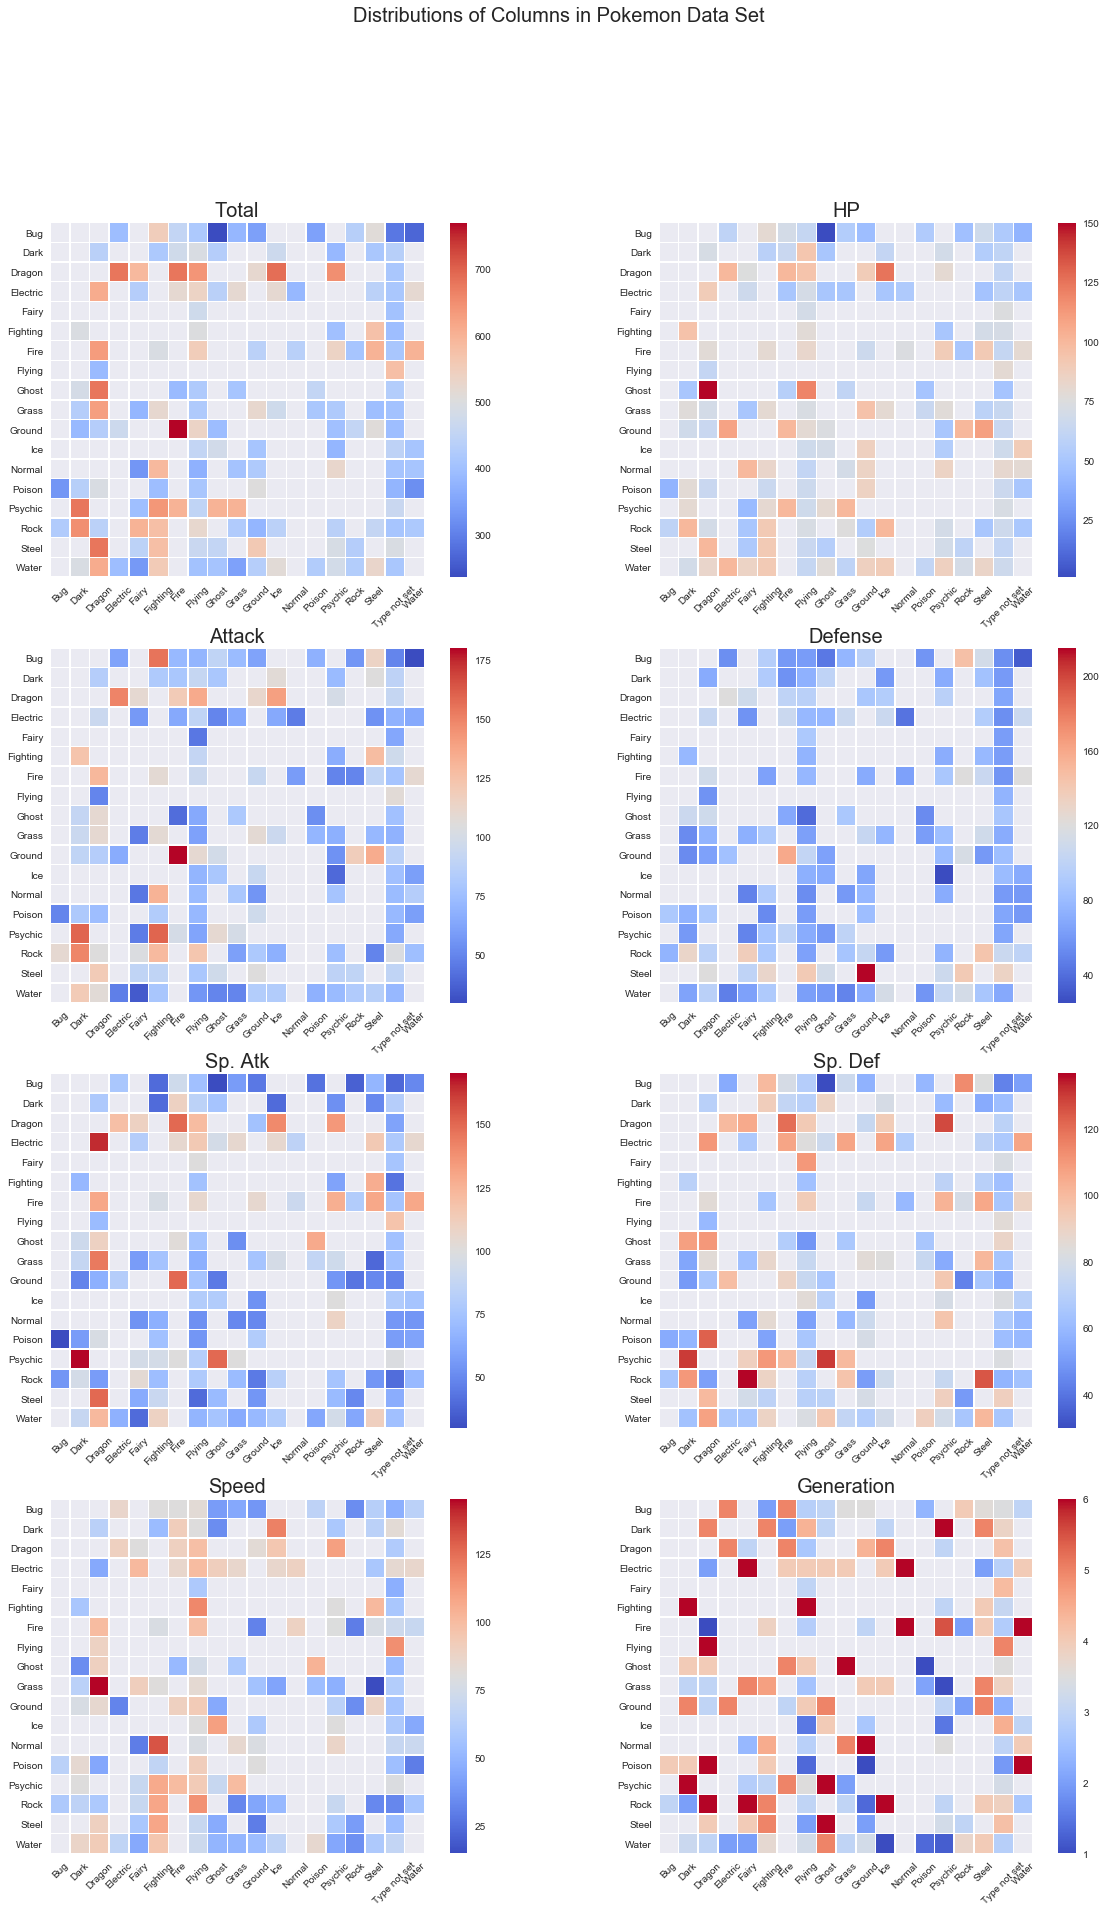

In [139]:
f, ax = plt.subplots(len(numerical_cols) / 2 + len(numerical_cols) %2, 2, figsize=(20,30))
for i, col in enumerate(numerical_cols):
    axx = ax[i / 2, i % 2]
    with sns.axes_style("white"):
        sns.heatmap(data.groupby(['Type 1', 'Type 2'])[col].mean().unstack(),
                    linewidths=0.5, cmap='coolwarm', ax=axx, square=True)
    axx.set_title(col, fontsize=20)
    axx.set_xticklabels(axx.xaxis.get_majorticklabels(), rotation=45)
    axx.set_xlabel("")
    axx.set_ylabel("")
f.suptitle("Distributions of Columns in Pokemon Data Set", fontsize=20)

Now, let's try the melt feature we all know from R's reshape2 package:

In [110]:
pkmn = pd.melt(data,
               id_vars=["Name", "Type 1", "Type 2"],
               value_vars = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
               var_name="Stat")

In [111]:
pkmn.sample(20)

,Name,Type 1,Type 2,Stat,value
2850,Luxray,Electric,Type not set,Sp. Atk,95
1709,Electrode,Electric,Type not set,Defense,70
3787,Swoobat,Psychic,Flying,Sp. Def,55
1805,Aipom,Normal,Type not set,Defense,55
1197,GlalieMega Glalie,Ice,Type not set,Attack,120
1734,Electabuzz,Electric,Type not set,Defense,57
1944,Roselia,Grass,Poison,Defense,45
2064,Pachirisu,Electric,Type not set,Defense,70
2107,Lumineon,Water,Type not set,Defense,76
510,Abomasnow,Grass,Ice,HP,90


And one fancy, so-called "swarmplot":

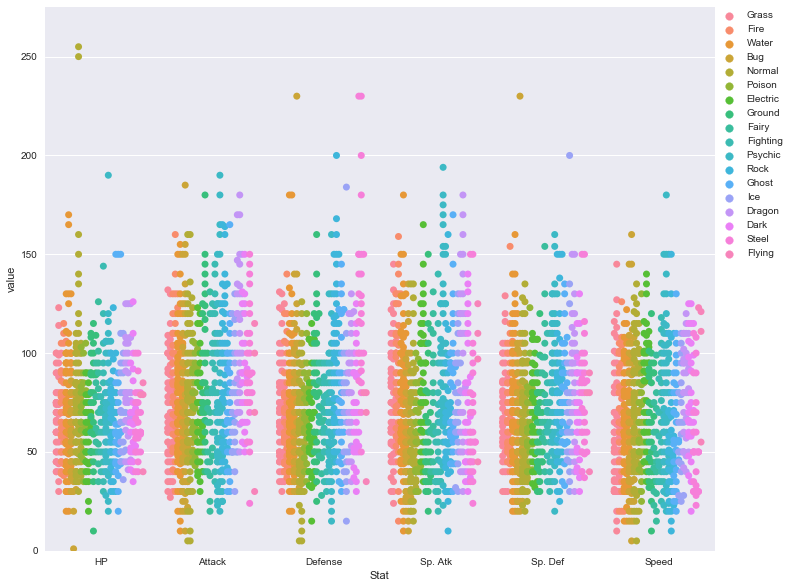

In [137]:
plt.figure(figsize=(12,10))
plt.ylim(0, 275)
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Type 1", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.gcf().savefig("figures/example_swarmplot.svg")